<a href="https://colab.research.google.com/github/Igoresv/Aprendizado-supervisionado/blob/main/Av1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


wine = pd.read_csv("winequalityN.csv")
wine2 = pd.read_csv("winequalityN.csv")
wine = wine.loc[wine['type'] == 'white']
wine_red = wine2.loc[wine2['type'] == 'red']

In [19]:
wine["opinion"] = wine['quality'].apply(lambda x: 0 if x <= 5 else 1)
wine_red["opinion"] =  wine_red['quality'].apply(lambda x: 0 if x <= 5 else 1)

vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol'
]

<ipython-input-19-051e5ac75682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_red["opinion"] =  wine_red['quality'].apply(lambda x: 0 if x <= 5 else 1)


In [20]:
for col, value in wine.items():
    if col != 'type':
        wine[col] = wine[col].fillna(wine[col].mean())
X= wine[vars]
y= wine ['opinion']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.2, # 20 % da base
                                                    random_state=171,
                                                    stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred_train = model.predict(X_train_scaled)


y_pred_test = model.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("Resultados para o conjunto de treinamento:")
print("Acurácia:", accuracy_train)
print("Precisão:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

print("Resultados para o conjunto de teste:")
print("Acurácia:", accuracy_test)
print("Precisão:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)


Resultados para o conjunto de treinamento:
Acurácia: 0.7539561000510464
Precisão: 0.7798227675528289
Recall: 0.8779739063699156
F1-score: 0.8259927797833935
Resultados para o conjunto de teste:
Acurácia: 0.736734693877551
Precisão: 0.7683923705722071
Recall: 0.8650306748466258
F1-score: 0.8138528138528138


In [22]:
cv = StratifiedKFold(n_splits=10)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, val_idx in cv.split(X, y):
    X_train

X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.2,
                                                    random_state=171,
                                                    stratify=y)


model_decision_tree = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10)
accuracy_scores = cross_val_score(model_decision_tree, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model_decision_tree, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(model_decision_tree, X_train, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(model_decision_tree, X_train, y_train, cv=cv, scoring='f1')


mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)

mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)


print("Resultados para o conjunto de teste:")
print("Média e desvio da acurácia:", mean_accuracy, std_accuracy)
print("Média e desvio da precisão:", mean_precision, std_precision)
print("Média e desvio da recall:", mean_recall, std_recall)
print("Média e desvio do F1-score:", mean_f1, std_f1)


Resultados para o conjunto de teste:
Média e desvio da acurácia: 0.7802436191868052 0.022454842747793843
Média e desvio da precisão: 0.8387007536951497 0.021671875858537724
Média e desvio da recall: 0.8319098143236074 0.024549016022108322
Média e desvio do F1-score: 0.8383925992016874 0.014318270706190798


Resultados para o conjunto de teste final:
Acurácia: 0.7622448979591837
Precisão: 0.8268330733229329
Recall: 0.8128834355828221
F1-score: 0.819798917246713


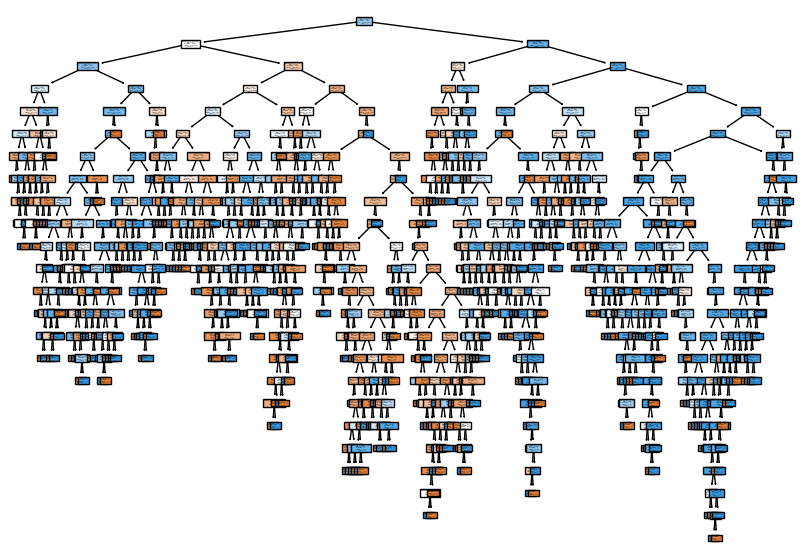

In [23]:
model_decision_tree.fit(X_train, y_train)


y_pred_test = model_decision_tree.predict(X_test)


accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Resultados para o conjunto de teste final:")
print("Acurácia:", accuracy_test)
print("Precisão:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)


plt.figure(figsize=(10, 7))
plot_tree(model_decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.2,
                                                    random_state=171,
                                                    stratify=y)


In [24]:
model_svm = SVC()
cv = StratifiedKFold(n_splits=10)
accuracy_scores = cross_val_score(model_svm, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model_svm, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(model_svm, X_train, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(model_svm, X_train, y_train, cv=cv, scoring='f1')


mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)

mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)


print("Resultados para o conjunto de teste:")
print("Média e desvio da acurácia:", mean_accuracy, std_accuracy)
print("Média e desvio da precisão:", mean_precision, std_precision)
print("Média e desvio da recall:", mean_recall, std_recall)
print("Média e desvio do F1-score:", mean_f1, std_f1)

Resultados para o conjunto de teste:
Média e desvio da acurácia: 0.6661562451067383 0.0021915451010945386
Média e desvio da precisão: 0.6658174172679107 0.001703734294821374
Média e desvio da recall: 1.0 0.0
Média e desvio do F1-score: 0.7993869731087474 0.0012276538859480944


In [25]:
model_svm.fit(X_train, y_train)


y_pred_test = model_svm.predict(X_test)


accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Resultados para o conjunto de teste final:")
print("Acurácia:", accuracy_test)
print("Precisão:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

Resultados para o conjunto de teste final:
Acurácia: 0.6673469387755102
Precisão: 0.6666666666666666
Recall: 1.0
F1-score: 0.8


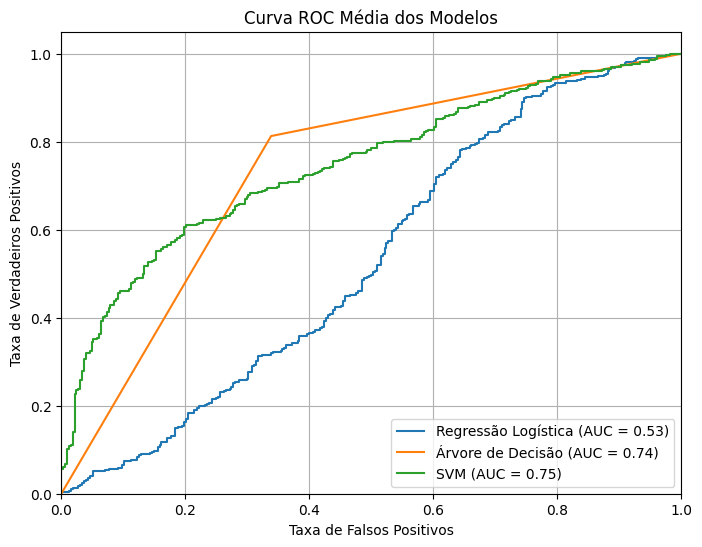

In [26]:
models = [model, model_decision_tree, model_svm]
model_names = ['Regressão Logística', 'Árvore de Decisão', 'SVM']


plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    if hasattr(model, 'predict_proba'):
        
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
       
        y_scores = model.decision_function(X_test)
      
        y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
  
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')




plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Média dos Modelos')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()
#Baseado na curva o SVM é mais efetivo

In [29]:
X_red = wine_red[vars]
y_red = wine_red['opinion']

for col, value in wine_red.items():
    if col != 'type':
        wine_red[col] = wine_red[col].fillna(wine_red[col].mean())

print(wine_red[vars].isna().sum())



X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red.values,
                                                                    y_red.values,
                                                                    test_size=0.2,
                                                                    random_state=171,
                                                                    stratify=y_red)

model_svm = SVC()
cv = StratifiedKFold(n_splits=10)
accuracy_scores_red = cross_val_score(model_svm, X_train_red, y_train_red, cv=cv, scoring='accuracy',error_score='raise')
precision_scores_red = cross_val_score(model_svm, X_train_red, y_train_red, cv=cv, scoring='precision')
recall_scores_red = cross_val_score(model_svm, X_train_red, y_train_red, cv=cv, scoring='recall')
f1_scores_red = cross_val_score(model_svm, X_train_red, y_train_red, cv=cv, scoring='f1')

mean_accuracy_red = np.mean(accuracy_scores_red)
std_accuracy_red = np.std(accuracy_scores_red)

mean_precision_red = np.mean(precision_scores_red)
std_precision_red = np.std(precision_scores_red)

mean_recall_red = np.mean(recall_scores_red)
std_recall_red = np.std(recall_scores_red)

mean_f1_red = np.mean(f1_scores_red)
std_f1_red = np.std(f1_scores_red)

print("Resultados para o conjunto de teste:")
print("Média e desvio da acurácia:", mean_accuracy_red, std_accuracy_red)
print("Média e desvio da precisão:", mean_precision_red, std_precision_red)
print("Média e desvio da recall:", mean_recall_red, std_recall_red)
print("Média e desvio do F1-score:", mean_f1_red, std_f1_red)

model_svm.fit(X_train_red, y_train_red)

y_pred_test_red = model_svm.predict(X_test_red)

accuracy_test_red = accuracy_score(y_test_red, y_pred_test_red)
precision_test_red = precision_score(y_test_red, y_pred_test_red)
recall_test_red = recall_score(y_test_red, y_pred_test_red)
f1_test_red = f1_score(y_test_red, y_pred_test_red)

print("Resultados para o conjunto de teste final:")
print("Acurácia:", accuracy_test_red)
print("Precisão:", precision_test_red)
print("Recall:", recall_test_red)
print("F1-score:", f1_test_red)


# Contar a quantidade de vinhos bons e ruins
good_red = sum(y_pred_test_red)
bad_red = len(y_pred_test_red) - good_red

print("Quantidade de vinhos bons (tinto):", good_red)
print("Quantidade de vinhos ruins (tinto):", bad_red)

<ipython-input-29-967dd7f22ebb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_red[col] = wine_red[col].fillna(wine_red[col].mean())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
Resultados para o conjunto de teste:
Média e desvio da acurácia: 0.6348978838582677 0.03324581538476352
Média e desvio da precisão: 0.6160310644671069 0.023830742560665107
Média e desvio da recall: 0.8435421994884911 0.038355290703309376
Média e desvio do F1-score: 0.7118186361604999 0.02683841823771593
Resultados para o conjunto de teste final:
Acurácia: 0.665625
Precisão: 0.6391304347826087
Recall: 0.8596491228070176
F1-score: 0.7331670822942643
Quantidade de vinhos bons (tinto): 230
Quantidade de vinhos ruins (tinto): 90
